# Business Understanding

The company would like to create a new movie studio for original video content, but we don't have any experience with making movies.  Here, we want to explore what types of films are performing best at the box office currently in order to make recommendations about what type of films to create in our new studio.

# Data Understanding

We are working with two datasets provided by IMDB and The Numbers.  The data includes information about movies and their genres, ratings, staff, domestic and international gross revenue, budget, and more.

## Data Preparation

Importing necessary libraries and getting a look at my two data sources below.

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('data/im.db')

In [2]:
IMDB = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
IMDB

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [3]:
pd.read_sql("SELECT * FROM movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


I might like to make recommendations for genres and writers, so I'm going to pull that information from the database and combine it into a dataframe for easier manipulation.

In [4]:
query = '''
SELECT
    mb.*,
    p.primary_name AS writer_name
FROM
    movie_basics AS mb
JOIN
    writers AS w ON mb.movie_id = w.movie_id
JOIN
    persons AS p ON w.person_id = p.person_id;
'''

IMDB_df = pd.read_sql(query, conn)
IMDB_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,writer_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Abrar Alvi
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Gulzar
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Mahasweta Devi
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Anjana Rawail
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Orson Welles
...,...,...,...,...,...,...,...
255866,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
255867,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo
255868,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo
255869,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Angela Gurgel


In [5]:
conn.close()

In [6]:
TN = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [7]:
TN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


I can calculate ROI from the information in this file, so that seems like a good way to evaluate the success of a movie.  Release date is another variable I'd like to check out for correlation  with ROI.  Below I will combine writers, genres, release date, and calculate ROI, combining all into a dataframe I can use for analysis.  First I'm changing monetary column values from string to integer in order to perform mathematical operations, removing the dollar signs and commas and such...

In [9]:
columns_without_symbols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in columns_without_symbols:
    TN[col] = TN[col].str.replace('$', '', regex=False)
    TN[col] = TN[col].str.replace(',', '', regex=False)

In [12]:
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Converting to numeric, and then I'm going to calculate profit and ROI from the values provided above, so that I can use ROI as a measure of movie success moving forward.

In [13]:
converted_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in converted_columns:
    TN[col] = pd.to_numeric(TN[col], errors='coerce')

In [14]:
TN['profit'] = (TN['domestic_gross'] + TN['worldwide_gross']) - TN['production_budget']
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


Note that we report ROI as a percentage, so we multiply by 100.

In [15]:
TN['ROI'] = (TN['profit'] / TN['production_budget']) * 100
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,732.200683
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300,-44.992943
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,463.224389
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,511.010451


Release date, or more specifically the time of year a movie is released, may have some correlation with ROI.  Let's convert release_date to datetime and extract the month of release to better evaluate that.

In [16]:
TN['release_date'] = pd.to_datetime(TN['release_date'])

In [17]:
TN['release_month'] = TN['release_date'].dt.strftime('%b')

In [18]:
TN

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300,-44.992943,Jun
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,463.224389,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,511.010451,Dec
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec
5778,79,1999-04-02,Following,6000,48482,240495,282977,4716.283333,Apr
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-2324,-46.480000,Jul
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep


# Exploratory Data Analysis

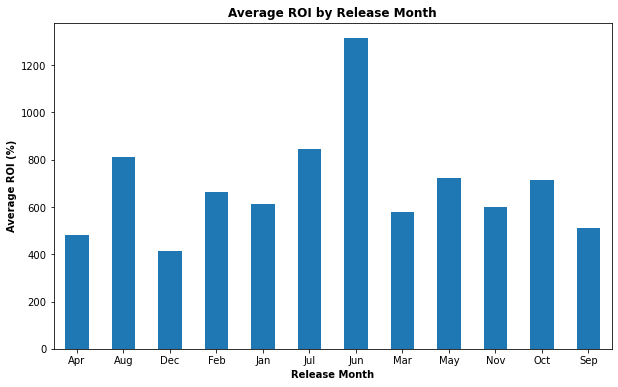

In [69]:
import matplotlib.pyplot as plt
ROI_by_month = TN.groupby('release_month')['ROI'].mean()

ROI_by_month.plot(kind='bar', figsize=(10,6))

plt.title('Average ROI by Release Month', fontweight='bold')
plt.xlabel('Release Month', fontweight='bold')
plt.ylabel('Average ROI (%)', fontweight='bold')
plt.xticks(rotation=0)
plt.show
plt.savefig('roi_by_month.png', facecolor='white')

June, July, August!  Summer looks good, and specifically early summer.  Okay, now I'm going to combine the two data sources to get a look at genre and writers and see what kind of relationship exists, if any.

In [28]:
df = pd.merge(TN,
             IMDB_df[['primary_title', 'genres', 'writer_name']],
left_on='movie',
right_on='primary_title',
how='inner')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,primary_title,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Avatar,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Avatar,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",Stuart Beattie
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",Ted Elliott
4,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",Tim Powers
...,...,...,...,...,...,...,...,...,...,...,...,...
8522,73,2012-01-13,Newlyweds,9000,4584,4584,168,1.866667,Jan,Newlyweds,"Comedy,Drama",Edward Burns
8523,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,Red 11,"Horror,Sci-Fi,Thriller",Robert Rodriguez
8524,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,Red 11,"Horror,Sci-Fi,Thriller",Racer Rodriguez
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,A Plague So Pleasant,"Drama,Horror,Thriller",Benjamin Roberds


Removing the primary_title column since it is now redundant.

In [29]:
df = df.drop('primary_title', axis=1)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,"Action,Adventure,Fantasy",Stuart Beattie
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,"Action,Adventure,Fantasy",Ted Elliott
4,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,"Action,Adventure,Fantasy",Tim Powers
...,...,...,...,...,...,...,...,...,...,...,...
8522,73,2012-01-13,Newlyweds,9000,4584,4584,168,1.866667,Jan,"Comedy,Drama",Edward Burns
8523,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,"Horror,Sci-Fi,Thriller",Robert Rodriguez
8524,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,"Horror,Sci-Fi,Thriller",Racer Rodriguez
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,"Drama,Horror,Thriller",Benjamin Roberds


The genres column is kind of messy since many movies have multiple genres.  I'm going to separate all of those genres out... it's fine for a movie to have multiple genres, but it's just easier to analyze if there is only one value in the genres column per row.  I can use the comma separated values to separate them out so that these movies have multiple rows with just one genre each.

In [30]:
df_exploded = df.assign(genres=df['genres'].str.split(',')).explode('genres')
ROI_by_genre = df_exploded.groupby('genres')['ROI'].mean().sort_values(ascending=False)
df_exploded

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Action,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Adventure,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Fantasy,Stuart Beattie
...,...,...,...,...,...,...,...,...,...,...,...
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Thriller,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Drama,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds


Let's keep our data modern and relevant, as trends come and go and people might be interested in different kinds of movies today than they were in say, the 1940s.  Let's use data back to 1995.

In [31]:
cutoff_date = pd.to_datetime('1995-01-01')
df_modern = df_exploded[df_exploded['release_date'] >= cutoff_date]
df_modern

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Action,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Adventure,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Fantasy,Stuart Beattie
...,...,...,...,...,...,...,...,...,...,...,...
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Thriller,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Drama,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds


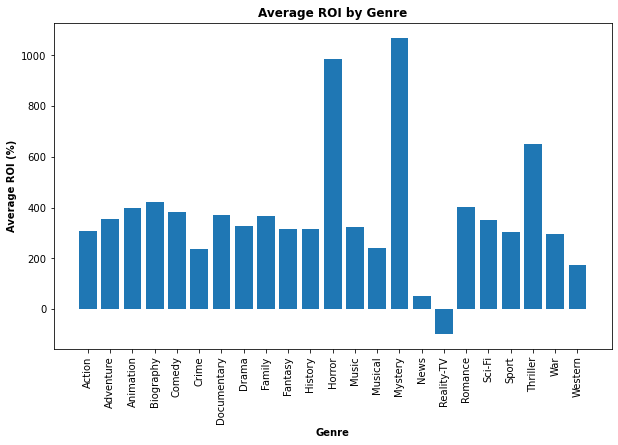

In [68]:
ROI_by_genre = df_modern.groupby('genres')['ROI'].mean().reset_index()

plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(ROI_by_genre['genres'], ROI_by_genre['ROI'])
plt.title('Average ROI by Genre', fontweight='bold')
plt.xlabel('Genre', fontweight='bold')
plt.ylabel('Average ROI (%)', fontweight='bold')
plt.xticks(rotation=90)
plt.show
plt.savefig('ROI_by_genre.png', facecolor='white', edgecolor='none')

Wow, look at mystery, horror and thriller!  Those seems like great choices.  Intuitively, that makes sense since they probably have lower production budgets most of the time.  Let's get rid of the other genres in our data and find the best writers for these types of movies.

In [36]:
best_genres = ['Horror', 'Mystery', 'Thriller']
df_filtered = df_modern[df_modern['genres'].isin(best_genres)]
df_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
52,10,2015-11-06,Spectre,300000000,200074175,879620923,779695098,259.898366,Nov,Thriller,Ian Fleming
53,10,2015-11-06,Spectre,300000000,200074175,879620923,779695098,259.898366,Nov,Thriller,Jez Butterworth
54,10,2015-11-06,Spectre,300000000,200074175,879620923,779695098,259.898366,Nov,Thriller,John Logan
...,...,...,...,...,...,...,...,...,...,...,...
8524,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,Thriller,Racer Rodriguez
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Thriller,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds


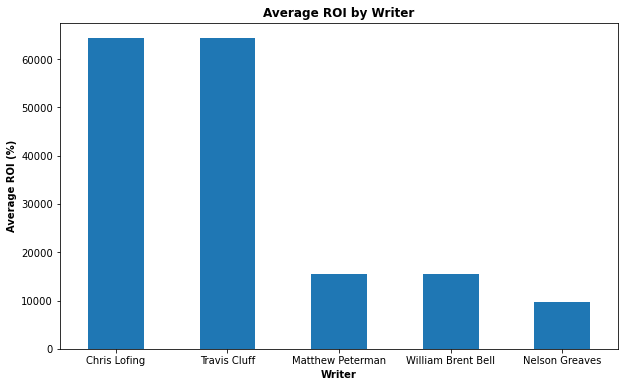

In [62]:
ROI_by_writer = df_filtered.groupby('writer_name')['ROI'].mean().nlargest(5)

plt.figure(figsize=(10, 6))
ROI_by_writer.plot(kind='bar')
plt.title('Average ROI by Writer', fontweight='bold')
plt.xlabel('Writer', fontweight='bold')
plt.ylabel('Average ROI (%)', fontweight='bold')
plt.xticks(rotation=360)
plt.show
plt.savefig('ROI_by_writer.png', facecolor='white')

It looks like Chris Lofing, Travis Cluff, and Matthew Peterman would be solid recommendations for writers we should try to work with.

# Conclusions

1) Release dates in the summer, ideally early summer (June), are correlated with the best ROI.

2) Horror, mystery, and thriller genres are associated with the highest ROI.

3) Chris Lofing, Travis Cluff, and Matthew Peterman are writers associated with the highest ROI movies in the horror, mystery, and thriller genres.

## Limitations

Even though we have a good amount of data covering a long time period, the rise of streaming movies is still a new development that will continue to change the way consumers watch movies and even what they watch.  There are also societal changes that could cause preferences to evolve over time.  We also had no information about marketing budget in this data, so that should be evaluated as well.

## Recommendations

1) We should work toward a goal of summer release dates, ideally in June.

2) Horror, mystery, and thriller genres are recommended.

3) Chris Lofing, Travis Cluff, and Matthew Peterman are writers we should try to work with.

## Next Steps

1) This is an ever-evolving industry, so keeping tabs on this data and how it changes is essential.

2) It would be good to get some information about marketing budgets and to what extent marketing could help achieve an even better ROI for our movies.